In [1]:
#importing necessry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('datasets/Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
dataset.shape

(178, 14)

In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

#### Data Standardization

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### Splitting the data into training and test data/sample

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Applying PCA: Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None) # since we do not know how many eigenvectors
# are needed we keep the value of n_components = None so that we can the
# find eigenvalues of all the eigenvectors to figure out the best one
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.36722576 0.19231879 0.10830194 0.07414597 0.06288414 0.05059778
 0.0419487  0.02518069 0.02222384 0.01858596 0.01712304 0.01277985
 0.00668354]


<p>These 13 results that we get are the explained_variance_ratio, out of these we can see that the first and the second results 0.36722576, 0.19231879 consists of a more of the percentage of the data. And since plotting the data in 2D space is easier and also easy to understand we'll use these two values which is total ‭0.55954439‬ of the total data i.e., approx 56%</p>

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # since we do not know how many eigenvectors
# are needed we keep the value of n_components = None so that we can the
# find eigenvalues of all the eigenvectors to figure out the best one
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36722576, 0.19231879])

### Applying using KNearestNeighbors

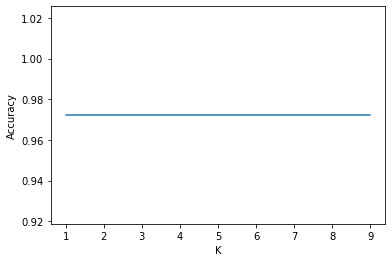

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

acc = []
k_rng = range(1,10)
for k in k_rng:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

    
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k_rng,acc)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

kn = KNeighborsClassifier(n_neighbors = 6)
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [11]:
test = np.array()

array([[ 2.18260094, -1.07829946],
       [-2.55593867, -1.87697451],
       [ 2.22444866,  1.71273398],
       [ 2.47922076, -1.43371292],
       [-0.30571137,  0.52687402]])

In [12]:
'''([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1]'''

'([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,\n       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1]'

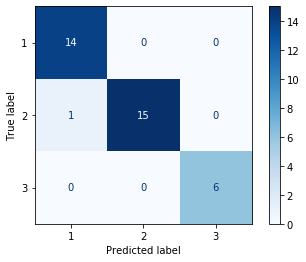

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Accuracy Score:  0.9722222222222222


In [13]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
plot_confusion_matrix(kn,X_test , y_test, cmap = plt.cm.Blues)
plt.show()
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',accuracy)

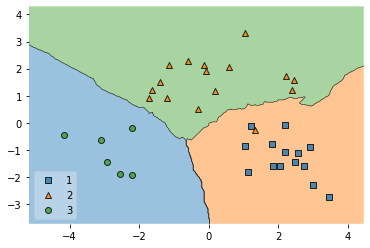

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, clf=kn, legend = 3)